# Job Recommendation System

# Phase 3: Unsupervised Learning

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
In this phase, we will use both K-means and DBSCAN clustering algorithms to group the dataset into meaningful clusters. These algorithms were chosen for their strengths in handling the unique characteristics of our Job Recommendation Dataset.

K-means is selected for its ability to predefine the number of clusters (K), which aligns with our goal of categorizing job titles, skills, and roles into distinct groups. It is computationally efficient for large datasets and minimizes within-cluster variance, ensuring cohesive groups with shared characteristics. Its interpretability makes it ideal for initial exploration.

DBSCAN, on the other hand, is effective for identifying clusters of varying shapes and sizes, as well as detecting outliers. Unlike K-means, it does not require a predefined number of clusters, making it flexible for uncovering natural groupings. 
</div>

## Load required libraries

In [14]:
from sklearn.cluster import KMeans # for k-means clustering
from sklearn.cluster import DBSCAN # for DBSCAN clustering
import pandas as pd # for dealing with dataframes
import pickle # for saving k-means model to hard drive
from sklearn.metrics import silhouette_score # for calculating silhouette score
import numpy as np # for array operations
import warnings # for ignoring warning message
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn.manifold import TSNE # for visualizing clusters

## Load processed and transformed datasets

In [15]:
# load processed and transformed datasets
processed_df = pd.read_csv('Dataset/processed_job_dataset.csv')
transformed_df = pd.read_csv('Dataset/transformed_job_dataset.csv')

### Separate the features from the target attribute

In [16]:
# target attrute
target = transformed_df['job_title']

# features
features = transformed_df.drop(['job_title'], axis = 1)

# Using K-Means Model for clustering the dataset using different number of clusters

In [17]:
wcss_values = []
silhouette_values = []
num_clusters = range(2, 11)
for n in num_clusters:
    KmeansModel = KMeans(n_clusters=n, random_state=42, n_init=10)
    KmeansModel.fit(features)
    wcss_values.append(KmeansModel.inertia_)
    silhouette_values.append(silhouette_score(features, KmeansModel.labels_))

### Plot WCSS vs. Number of Clusters

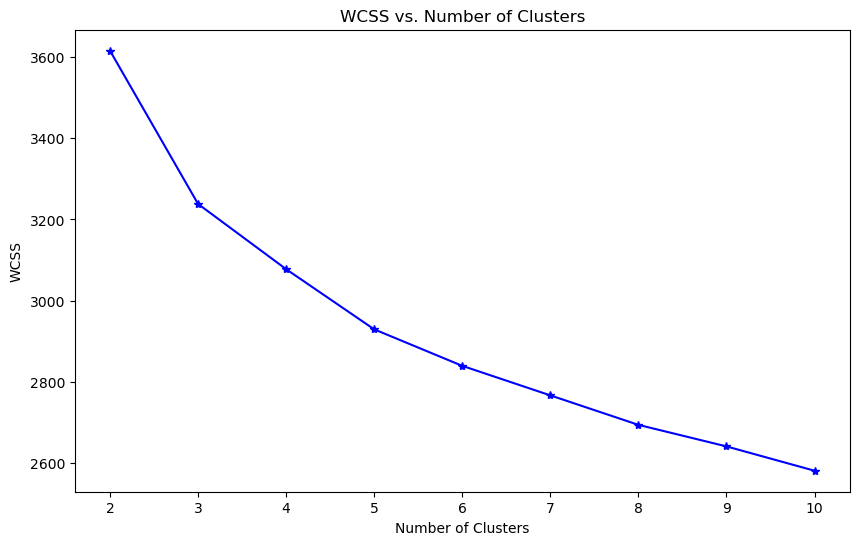

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss_values, marker='*', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.show()

### Plot Silhouette Score vs. Number of Clusters

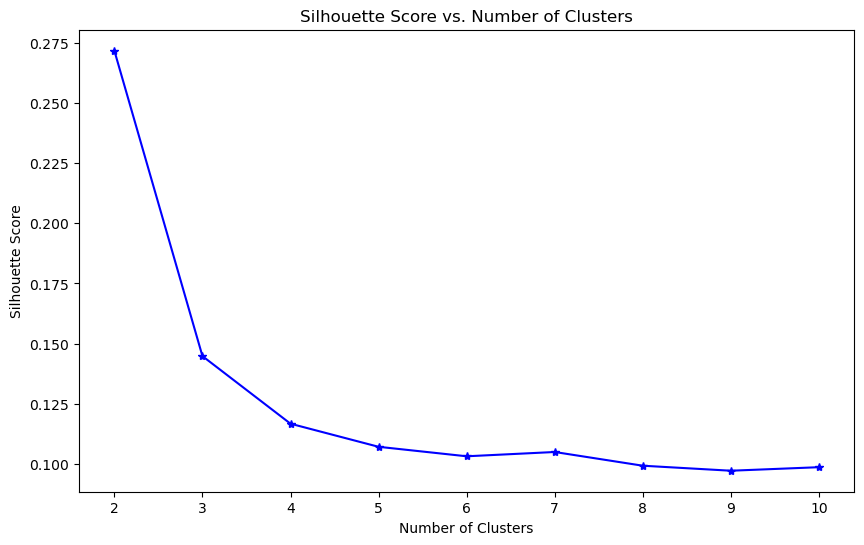

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_values, marker='*', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
The Elbow Method graph for determining the optimal number of clusters clearly shows an "elbow" at K=3. This indicates a substantial decrease in the Within-Cluster Sum of Squares (WCSS) up to this point, suggesting that increasing the number of clusters beyond K=3 results in diminishing returns. The WCSS value of 3238.20 at K=3 further supports the suitability of this choice, as it strikes a balance between effective data compression and appropriate cluster granularity. Consequently, the optimal number of clusters is determined to be 3.
</div>

### Clustering the dataset using optimal no. of clusters

In [20]:
num_clusters_optimal = 3
KmeansModel = KMeans(n_clusters=num_clusters_optimal, random_state=42, n_init=10)
labels = KmeansModel.fit_predict(features)

### Calculate Silhouette Score using optimal no. of clusters

In [21]:
silhouette_value_kmeans = silhouette_score(features, labels)
print('Silhouette Score for K-Means Model, K=' + str(num_clusters_optimal) + ': ' + str(round(silhouette_value_kmeans, 3)))

Silhouette Score for K-Means Model, K=3: 0.145


<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
While the Silhouette Score reaches its highest value at K=2, the score of 0.145 at K=3 remains within an acceptable range, indicating that the clusters are relatively well-separated. This implies that, although some overlap may exist, the clusters formed at K=3 still exhibit distinct and meaningful characteristics.
</div>

### Calculate WCSS using optimal no. of clusters

In [22]:
wcss_value_kmeans = KmeansModel.inertia_
print(f'Total Within-Cluster Sum of Squares for K-Means, K={num_clusters_optimal}): {wcss_value_kmeans:.2f}')

Total Within-Cluster Sum of Squares for K-Means, K=3): 3238.20


### Calculate BCubed Precision and Recall

In [23]:
# a function that calculate the bcube precision and recall of clustering algorithms
def calculate_cluster_metrics(true_labels, predicted_labels):
    num_samples = len(true_labels)
    avg_precision = 0.0
    avg_recall = 0.0

    for idx in range(num_samples):
        current_true_label = true_labels[idx]
        current_pred_label = predicted_labels[idx]
        
        true_cluster_indices = set(np.where(true_labels == current_true_label)[0])
        pred_cluster_indices = set(np.where(predicted_labels == current_pred_label)[0])
        
        overlap = true_cluster_indices.intersection(pred_cluster_indices)
        avg_precision += len(overlap) / len(pred_cluster_indices)
        avg_recall += len(overlap) / len(true_cluster_indices)

    avg_precision /= num_samples
    avg_recall /= num_samples
    return avg_precision, avg_recall

In [24]:
precision_kmeans, recall_kmeans = calculate_cluster_metrics(target, labels)
print('BCubed Precision for K-Means Algorithm, K=' + str(num_clusters_optimal) + ': ' + str(round(precision_kmeans, 3)))
print('BCubed Recall for K-Means Algorithm, K=' + str(num_clusters_optimal) + ': ' + str(round(recall_kmeans, 3)))

BCubed Precision for K-Means Algorithm, K=3: 0.017
BCubed Recall for K-Means Algorithm, K=3: 0.998


<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
The BCubed Recall of 0.998, which is notably high, demonstrates that the K-Means algorithm at K=3 effectively groups a significant portion of related items together. On the other hand, the BCubed Precision of 0.017 indicates that while there is room for improvement in terms of cluster purity, the algorithm still succeeds in capturing some meaningful associations within the data.

When evaluating all three metrics collectively, K=3 emerges as a reasonable choice. The elbow method strongly supports this selection, and although the Silhouette Score and BCubed metrics highlight areas for potential refinement, they do not undermine the validity of this choice. This outcome establishes a solid foundation for the job recommendation system.

By setting K=3, the job recommendation system can effectively customize recommendations for three distinct user segments, enhancing its ability to deliver targeted and relevant suggestions.

To potentially enhance clustering performance and capture more meaningful patterns, we plan to apply the DBSCAN algorithm next. As a density-based method, DBSCAN may uncover clusters of arbitrary shape and handle noise points more effectively than K-Means. By leveraging DBSCAN’s adaptability to the underlying data structure, we hope to achieve more cohesive clusters and further improve the quality of recommendations.
</div>

### Visualizating Clusters using TSNE

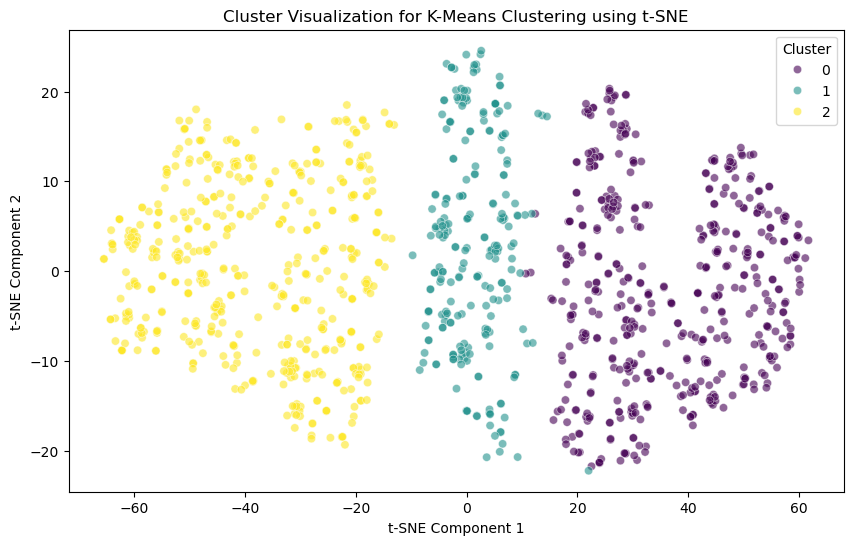

In [25]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=labels, palette='viridis', alpha=0.6)
plt.title('Cluster Visualization for K-Means Clustering using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
The t-SNE visualization graph demonstrates that the three clusters are well-separated, further supporting the choice of K=3 as the optimal number of clusters. This separation indicates distinct groupings within the data, reinforcing the effectiveness of the clustering approach for the job recommendation system.
</div>

In [26]:
# Save Kmeans model
pickle.dump(KmeansModel, open('KmeansModel.sav', 'wb'))

In [27]:
# save datasets
processed_df['group_labels'] = labels
processed_df.to_csv("Dataset/grouped_data.csv", index=False)

# Using DBSCAN Model for clustering the dataset

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering 
algorithm that groups together points that are closely packed together, marking points that are 
far away as outliers. It does not require the number of clusters to be specified in advance, 
making it useful for datasets where the number of clusters is unknown.
</div>

In [28]:
# Use DBSCAN Algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(features)

In [29]:
# Evaluate DBSCAN with Silhouette Score
if len(np.unique(dbscan_labels)) > 1:  # Silhouette Score requires at least 2 clusters
    silhouette_dbscan = silhouette_score(features, dbscan_labels)
    print('Silhouette Score (DBSCAN): ' + str(round(silhouette_dbscan, 3)))   
else:
    print("DBSCAN produced only one cluster. Silhouette Score cannot be computed.")

Silhouette Score (DBSCAN): -0.163


In [30]:
# Evaluate DBSCAN with BCubed Precision and Recall
if len(np.unique(dbscan_labels)) > 1:
    dbscan_bcubed_precision, dbscan_bcubed_recall = calculate_cluster_metrics(target, dbscan_labels)    
    print('BCubed Precision (DBSCAN): ' + str(round(dbscan_bcubed_precision, 3)))  
    print('BCubed Recall (DBSCAN): ' + str(round(dbscan_bcubed_recall, 3)))  
    
else:
    print("DBSCAN produced only one cluster. BCubed metrics cannot be computed.")

BCubed Precision (DBSCAN): 0.011
BCubed Recall (DBSCAN): 1.0


### Visualizating Clusters using TSNE

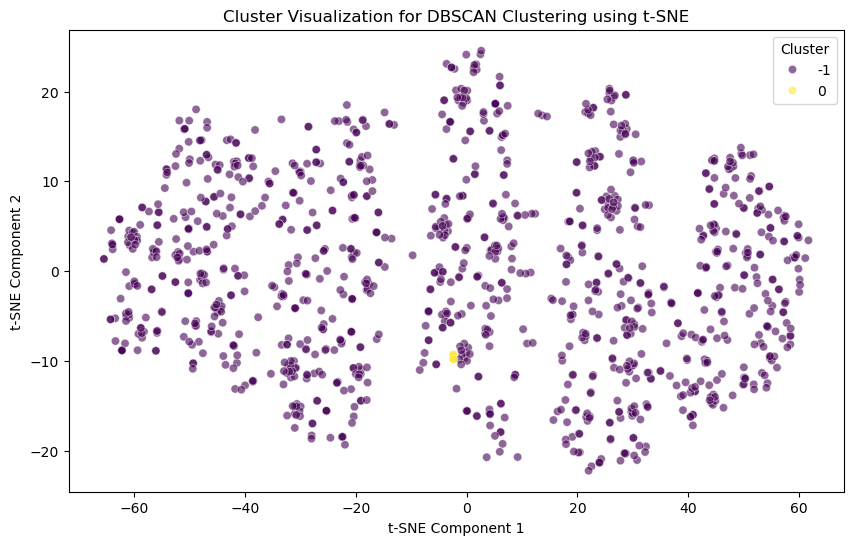

In [31]:
# t-SNE for DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.6)
plt.title('Cluster Visualization for DBSCAN Clustering using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
The t-SNE visualization graph shows poor separation between the clusters, which indicates that the DBSCAN algorithm did not cluster the data well.  
</div>

# Compare K-Means and DBSCAN Clustering Algorithms

In [32]:
print("\nComparison of K-Means and DBSCAN:")
print('K-Means Silhouette Score: ' + str(round(silhouette_value_kmeans, 3)))  

if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score: ' + str(round(silhouette_dbscan, 3)))  
print('K-Means BCubed Precision: ' + str(round(precision_kmeans,3)) + ',  Recall: ' + str(round(recall_kmeans, 3)))
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN BCubed Precision: ' + str(round(dbscan_bcubed_precision,3)) + ',  Recall: ' + str(round(dbscan_bcubed_recall, 3)))


Comparison of K-Means and DBSCAN:
K-Means Silhouette Score: 0.145
DBSCAN Silhouette Score: -0.163
K-Means BCubed Precision: 0.017,  Recall: 0.998
DBSCAN BCubed Precision: 0.011,  Recall: 1.0


### Results Summary

| Metric                | K-Means          | DBSCAN           |
|-----------------------|------------------|------------------|
| **Silhouette Score**  | 0.145            | -0.163           |
| **BCubed Precision**  | 0.017            | 0.011            |
| **BCubed Recall**     | 0.998            | 1.000            |

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">

### Analysis of Results

1. **Silhouette Score**:
   - **K-Means**: The Silhouette Score is **0.145**, which indicates that the clusters are somewhat separated, though the separation is not very strong (values closer to 1 indicate better-defined clusters).
   - **DBSCAN**: The Silhouette Score is **-0.163**, which is a negative value. This suggests that the clusters produced by DBSCAN are poorly defined, and many points may have been assigned to the wrong clusters. A negative Silhouette Score is generally a bad sign.

   **Conclusion**: K-Means performs significantly better than DBSCAN in terms of cluster separation.

2. **BCubed Precision**:
   - **K-Means**: The BCubed Precision is **0.017**, which is quite low. This indicates that the clusters produced by K-Means are not very pure (i.e., they contain a mix of different job titles).
   - **DBSCAN**: The BCubed Precision is **0.011**, which is even lower than K-Means. This suggests that DBSCAN's clusters are even less pure than those produced by K-Means.

   **Conclusion**: K-Means performs slightly better than DBSCAN in terms of cluster purity.

3. **BCubed Recall**:
   - **K-Means**: The BCubed Recall is **0.998**, which is very high. This indicates that K-Means is successful in grouping most of the related items together.
   - **DBSCAN**: The BCubed Recall is **1.000**, which is slightly better than K-Means. This suggests that DBSCAN is slightly better at grouping related items together.

   **Conclusion**: Both algorithms perform very well in terms of recall, with DBSCAN having a slight edge.

   **K-Means is the best algorithm for this dataset** because it produces better-defined clusters (higher Silhouette Score) and has slightly higher cluster purity (higher BCubed Precision). While DBSCAN has a slightly higher BCubed Recall, its poor Silhouette Score and low precision make it less suitable for your dataset. Stick with K-Means for your job recommendation system.
</div>

# Making Recommendations using K-means algorithm

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">
The clusters are utilized to enhance the job recommendation system by suggesting the top job titles within the same cluster. This approach ensures that users receive recommendations tailored to their specific cluster, leveraging the distinct characteristics and patterns identified within each group. By focusing on the top job titles from the same cluster, the system can provide more relevant and targeted recommendations, improving user satisfaction and engagement.
</div>

In [33]:
# sample user input
input_data = features.iloc[550,:]

In [34]:
# find cluster of the current input data
pred = KmeansModel.predict(np.array(input_data).reshape(1, -1))

In [35]:
# load grouped data
grouped_data = pd.read_csv('Dataset/grouped_data.csv')

In [36]:
# Fetch job titles in the same cluster
job_titles = grouped_data[grouped_data['group_labels'] == pred[0]]
top_job_titles = job_titles['job_title'].value_counts().head(3).index.tolist()

In [37]:
print('We recommend the following Job Titles: ')
for job_title in top_job_titles:
    print(job_title)

We recommend the following Job Titles: 
sales manager
salesperson
seasonal sales associate
